<a href="https://colab.research.google.com/github/ganeshkumar383/PythonBits/blob/main/ML_Assignment_1_Solution_Group_133_RaisinClassification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 1 Part 1

#Problem Statement Raisin Classification

Images of the Kecimen and Besni raisin varieties were captured using CVS. In total, 900 raisins were included in the study, with an equal distribution of 450 raisins from each variety. Seven morphological features were then extracted for analysis.
Do the necessary data exploration, data pre-processing, data preparation and build model using classification approach to predict the type of raisin.

In [15]:
# 1. Import the required libraries
print("1. Import the required libraries")
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

1. Import the required libraries


In [16]:
# 2. Data Visualization and Exploration

print("2.a. Print at least 5 rows for sanity check to identify all the features present "+
      "in the dataset and if the target matches with them.")
# Read the dataset
file_path = 'Raisin_Grains_Dataset.csv'
# Read the CSV file and convert it to a DataFrame
###check the target matches values

df = pd.read_csv(file_path,encoding='ISO-8859-1')
print(df.head())




2.a. Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [17]:
print("2.b.Print the description and shape of the dataset.")
print(df.describe())
print(df.shape)

2.b.Print the description and shape of the dataset.
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900.000000  
mean    91186.090000    0.699508  1165.906636  
std     40769.290132    0.053468   273.764315  
min     26139.000000    0.379856   619.074000  
25%     61513.250000    0.670869   966.410750  
50%     816

2.c. Provide appropriate visualization to get an insight about the dataset.


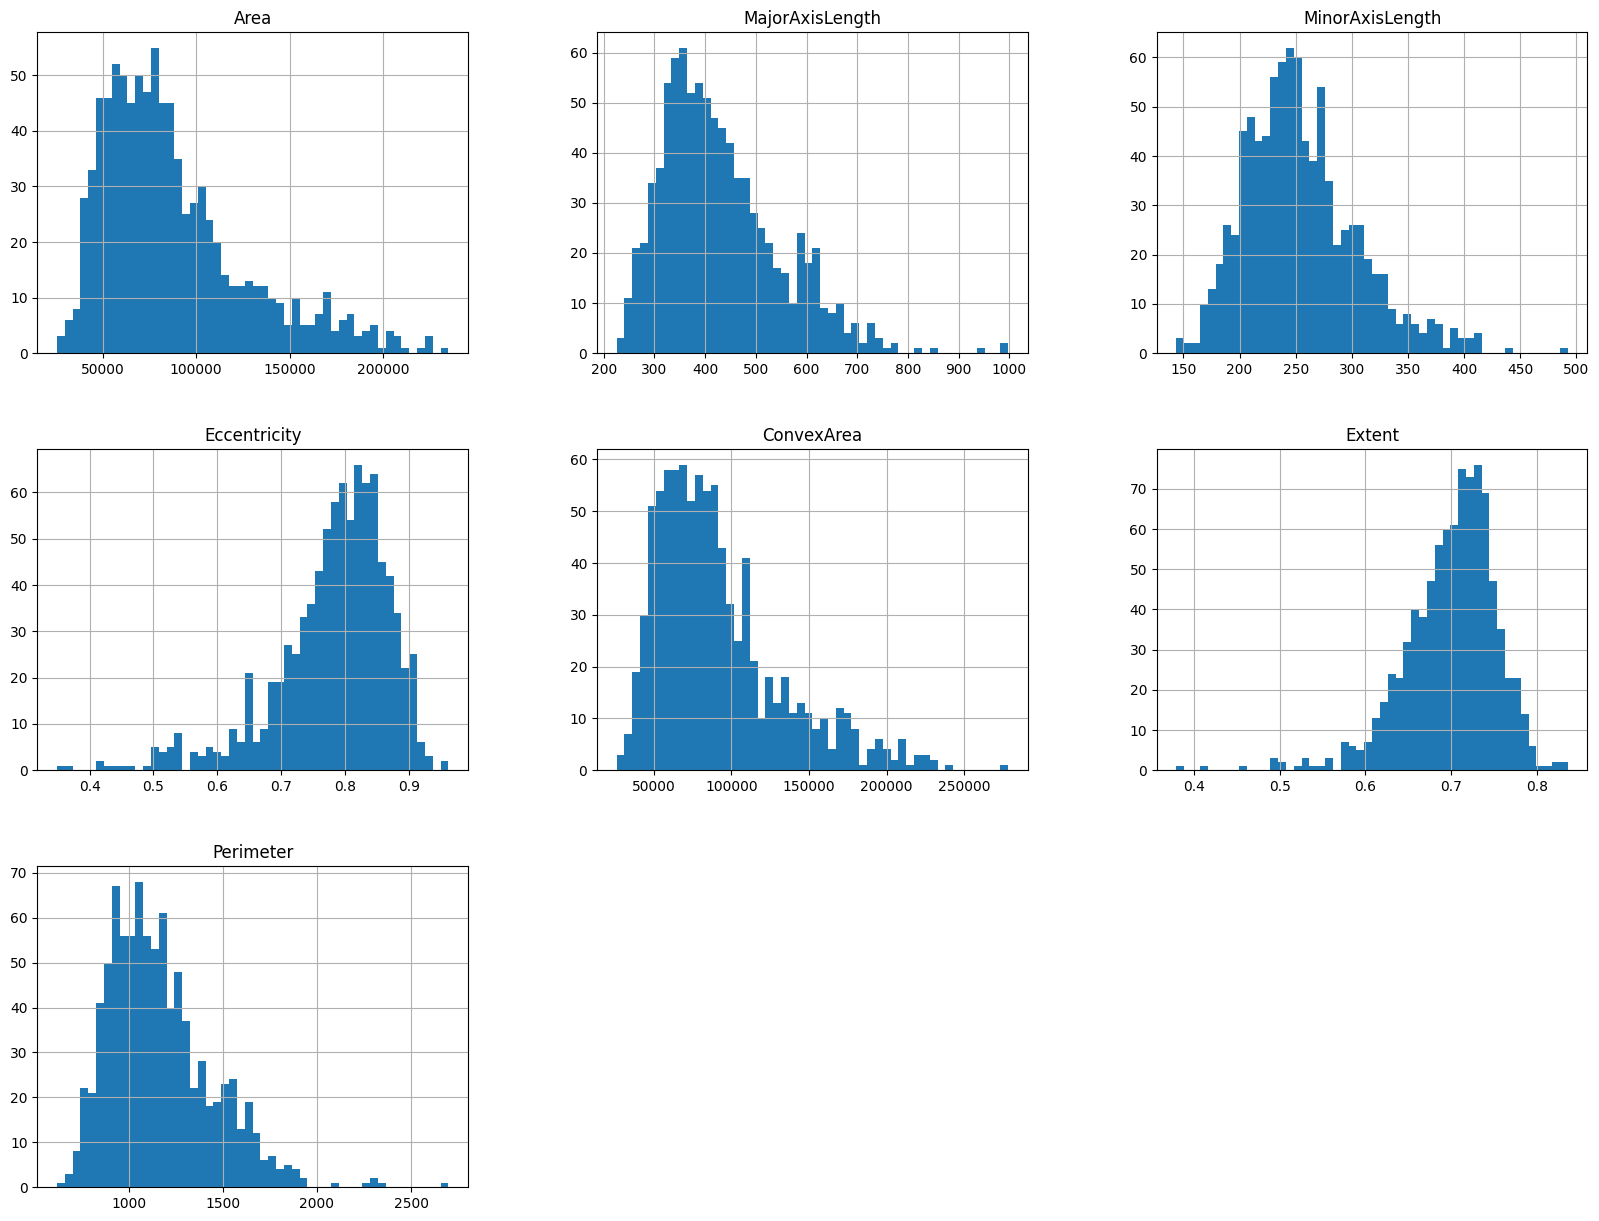

In [18]:
print("2.c. Provide appropriate visualization to get an insight about the dataset.")
df1 = df.drop(['Class'], axis=1)
# Histogram visualization
df.hist(bins=50,figsize=(20,15))
plt.show()

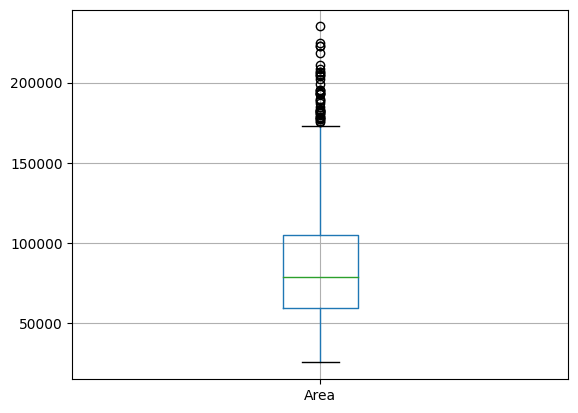

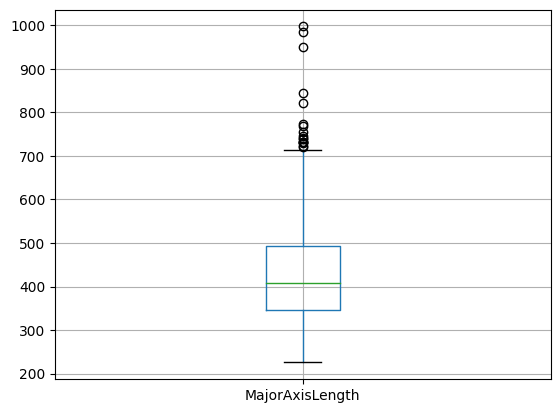

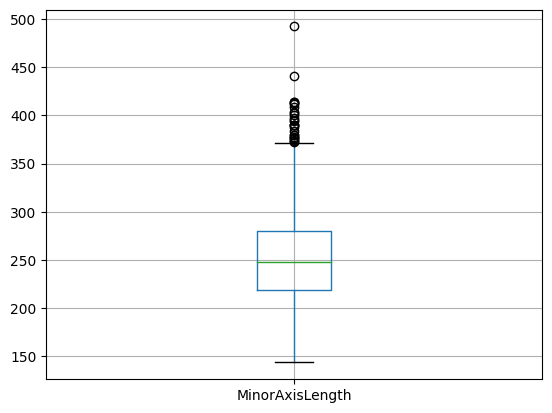

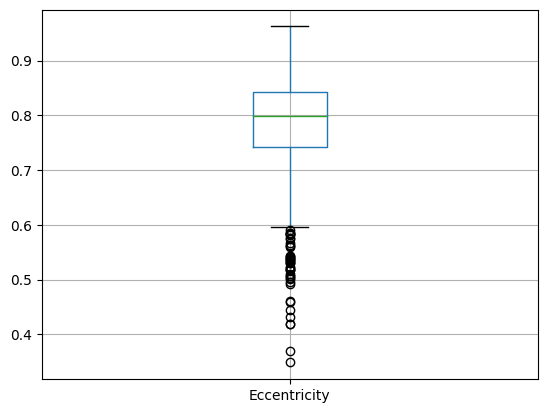

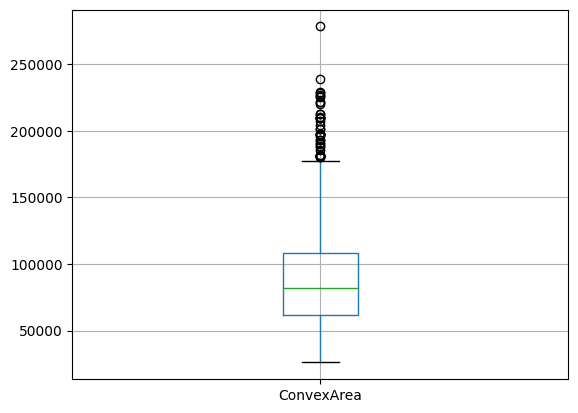

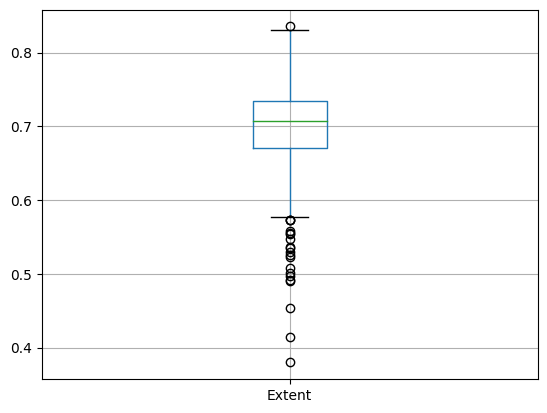

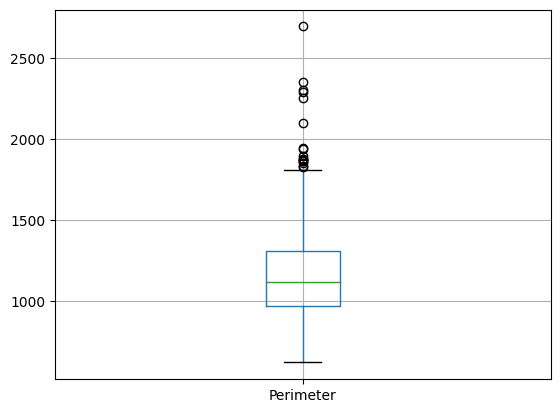

In [19]:
# Box Plots visualization
for column in df1.columns:
    plt.figure()
    df.boxplot([column])
    plt.show()

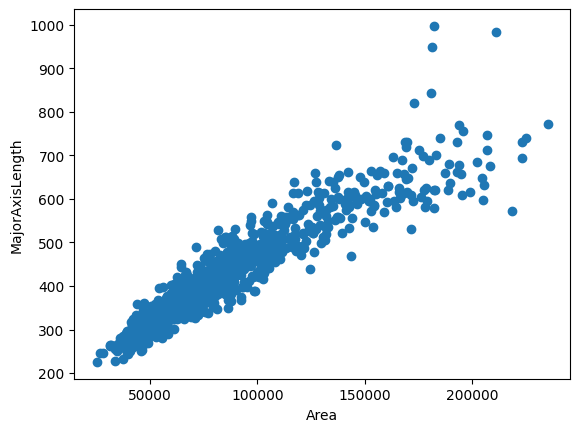

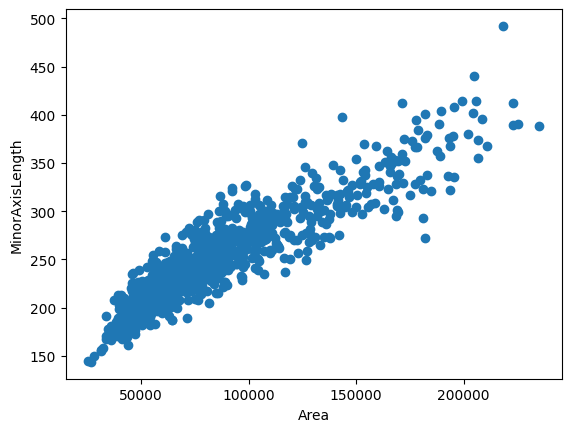

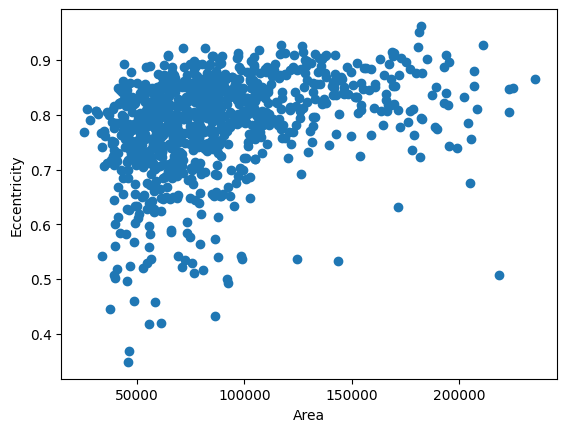

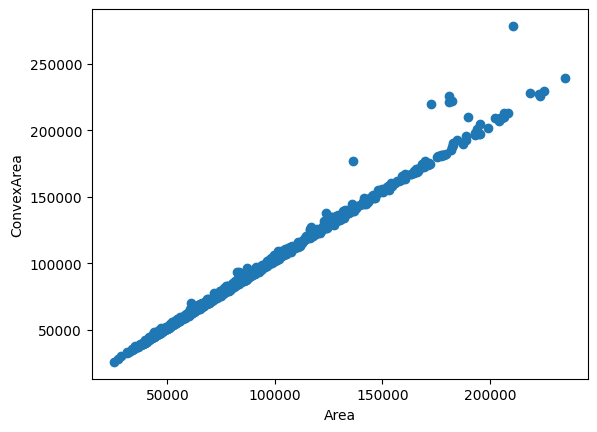

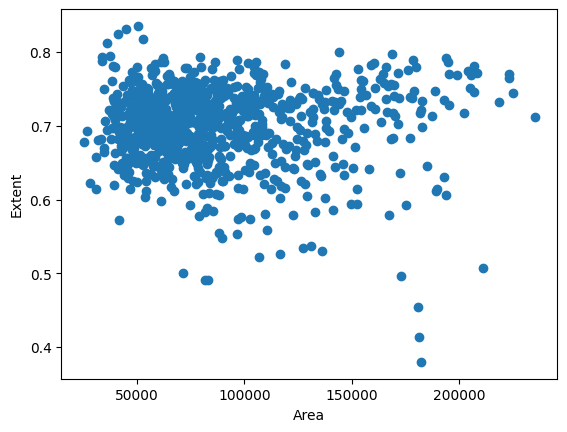

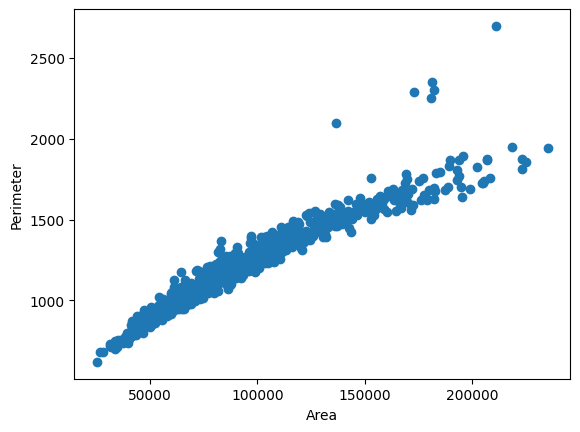

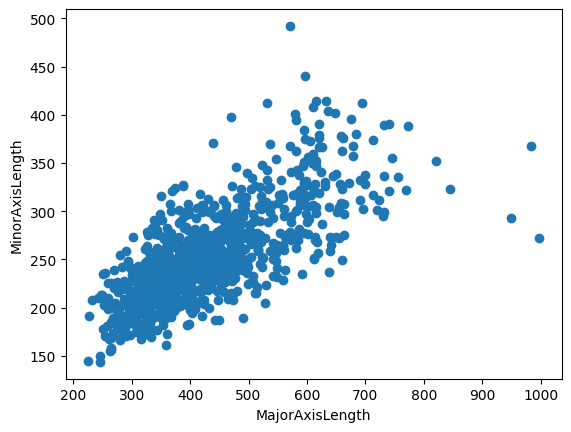

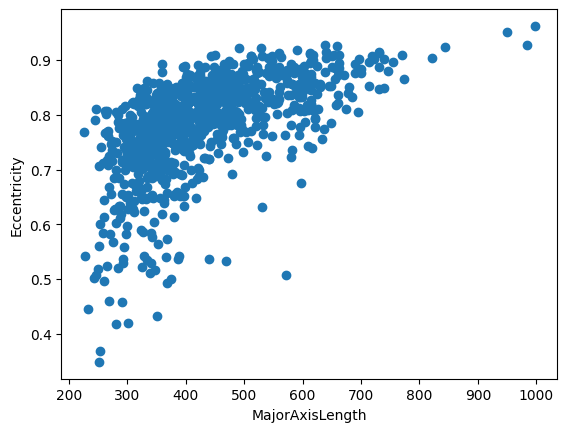

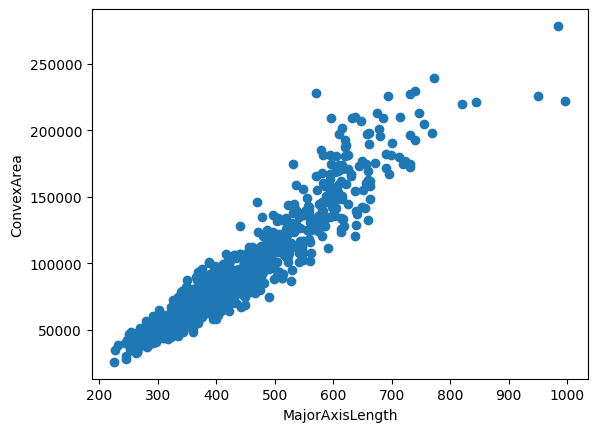

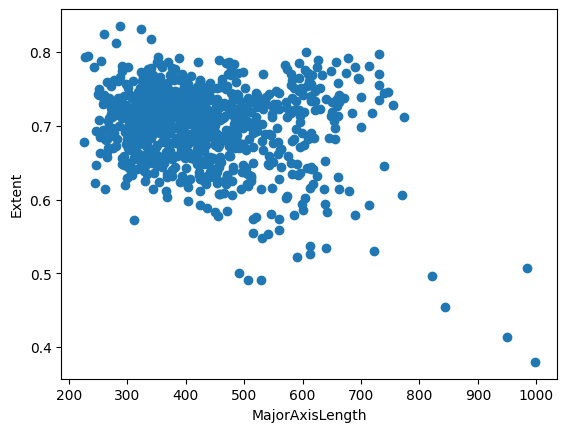

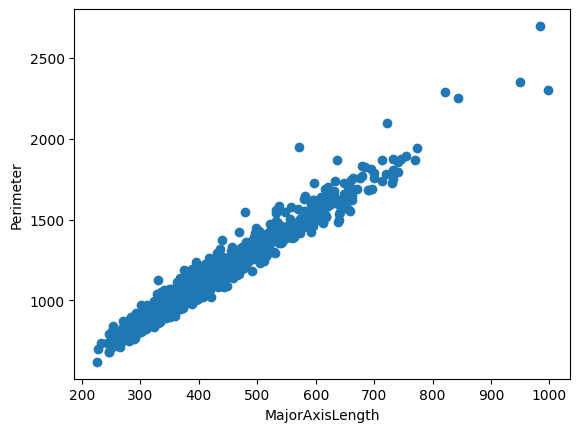

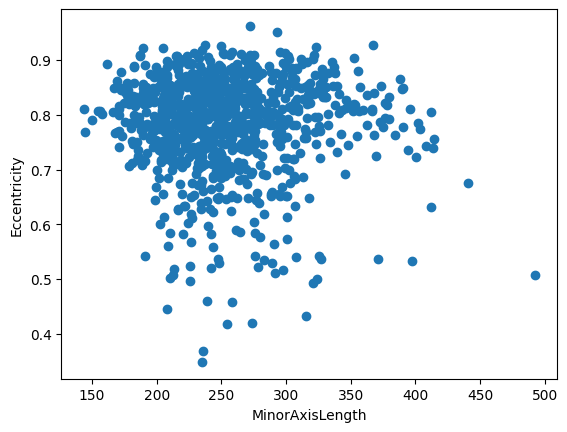

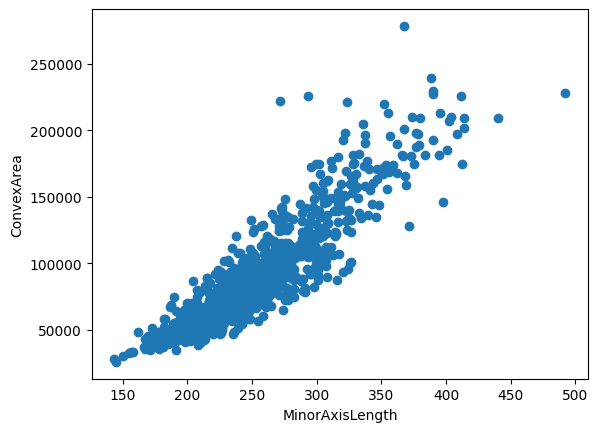

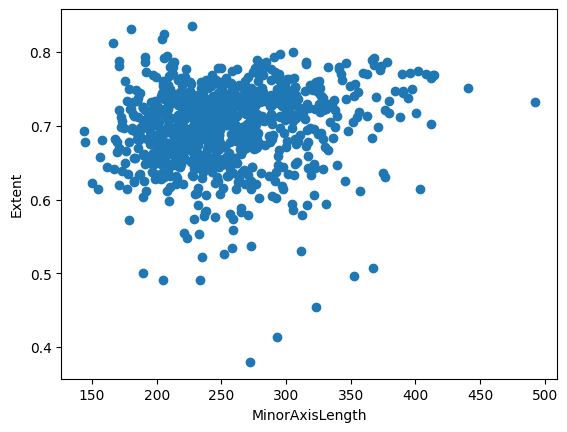

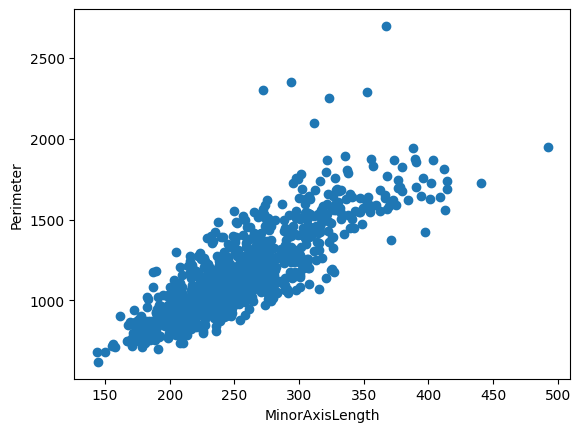

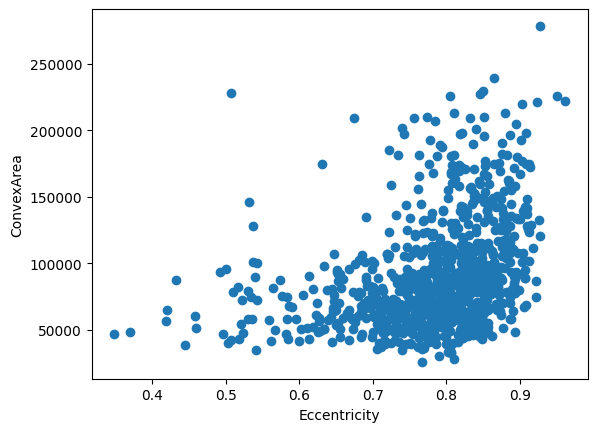

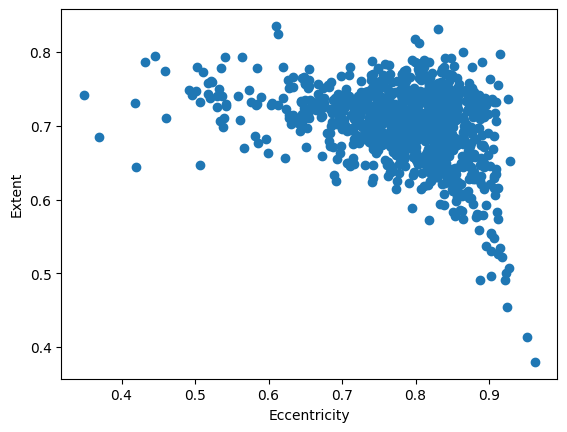

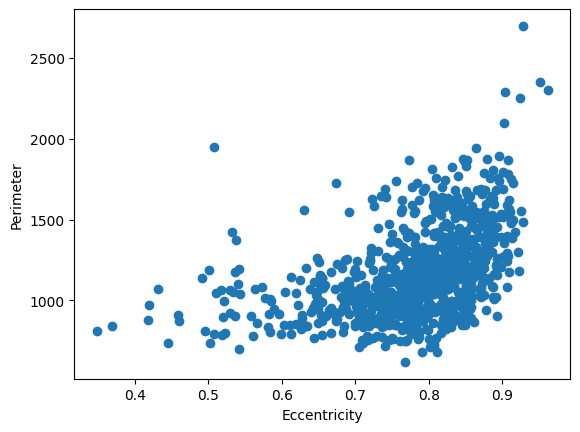

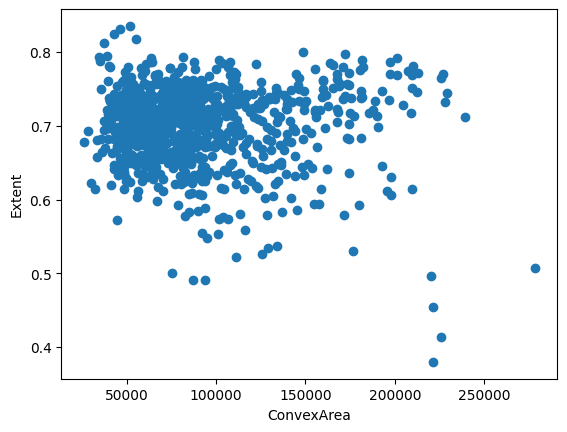

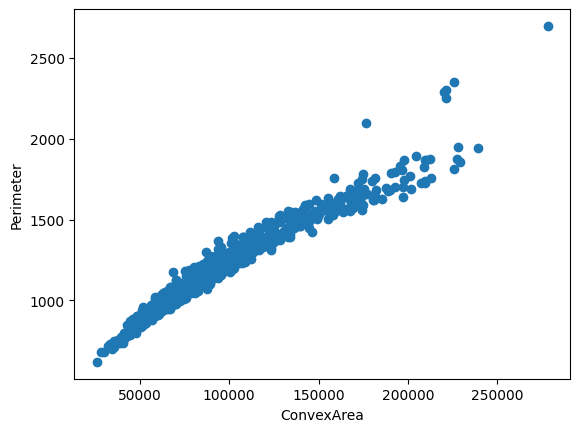

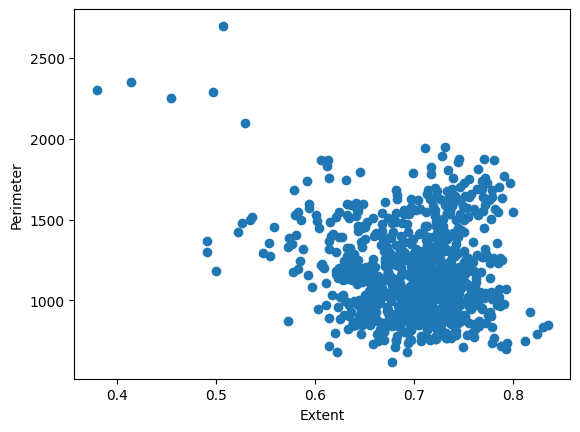

In [20]:

# Scatter Plots visualization
# Assuming 'feature1' and 'feature2' are two features inyour dataset
features = df1.columns
for i in range(len(features)):
    for j in range(i+1,len(features)):
        feature1 = features[i]
        feature2 = features[j]
        plt.scatter(df1[feature1],df1[feature2])
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()


In [21]:

print("2.d. Try exploring the data and see what insights can be drawn from the dataset.")


print(" Extent doesn't affect affect the outcome to a greater extent")
print(" Area is highly correlated with ConvexArea, MajorAxislength MinorAxisLength, and Perimeter")
print(" MajorAxisLength is highly correlated with ConvexArea andPerimeter")
print(" Eccentricity is lowly correlated with all other features")
print(" ConvexArea is highly correlated with Perimeter")

2.d. Try exploring the data and see what insights can be drawn from the dataset.
 Extent doesn't affect affect the outcome to a greater extent
 Area is highly correlated with ConvexArea, MajorAxislength MinorAxisLength, and Perimeter
 MajorAxisLength is highly correlated with ConvexArea andPerimeter
 Eccentricity is lowly correlated with all other features
 ConvexArea is highly correlated with Perimeter


In [22]:
# 3. Data Pre-processing and cleaning
print("a. Check for missing values")
print(df.isnull().sum())
#Removing the null values
for column in df1.columns:
    df1[column] = df1[column].dropna





a. Check for missing values
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [23]:

print("b. Apply the feature transformation techniques like Standardization, Normalization, etc. "+
      "You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.")
# Handle outliers and skewed data if needed
# Calculate IQR for each column in df
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
# Define a mask for values which outliers in their respective columns
outlier_mask = ((df1 < (Q1-1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))
# Print the outliers
print(outlier_mask)
print('-------------------------------------------------------------------------------------------------------')
outliers = df1[outlier_mask.any(axis=1)]
print(outliers)
# If you want to remove the outliers the dataset
df_no_outliers = df1[~outlier_mask].dropna()
# df_no_outliers.hist(bins=50,ze=(20,15))
# plt.show()
#for column in df1.columns:
#     max_value = max(df1[column])
#     min_value = min(df1[column])
#     print('Max value of  column  '+str(max_value) + ' and Min value is ' + str(minvalue))

#Normalization of Class Data
results = {'Kecimen': 0, 'Besni': 1}
df['Class'] = df['Class'].map(results)


b. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.
      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    False            False            False         False       False   
1    False            False            False         False       False   
2    False            False            False         False       False   
3    False            False            False         False       False   
4    False            False            False         False       False   
..     ...              ...              ...           ...         ...   
895  False            False            False         False       False   
896  False            False            False         False       False   
897  False            False            False         False       False   
898  False            False            False        

<ipython-input-23-1b40ef658c1e>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-23-1b40ef658c1e>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)
<ipython-input-23-1b40ef658c1e>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_mask = ((df1 < (Q1-1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))


In [24]:
print("c. Do the correlational analysis on the dataset. Provide a visualization for the same.")
correlations_no_outliers=df.corr()['Class'].abs()
threshold = 0.5
selected_features_no_outliers = correlations_no_outliers[correlations_no_outliers > threshold].index
print(selected_features_no_outliers)

c. Do the correlational analysis on the dataset. Provide a visualization for the same.
Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'Perimeter',
       'Class'],
      dtype='object')


4. Data Preparation
a. Do the final feature selection and extract them into Column X and the class label into Column into Y.
      Area  MajorAxisLength  MinorAxisLength  ConvexArea  Perimeter  Class
0    87524       442.246011       253.291155       90546   1184.040      0
1    75166       406.690687       243.032436       78789   1121.786      0
2    90856       442.267048       266.328318       93717   1208.575      0
3    45928       286.540559       208.760042       47336    844.162      0
4    79408       352.190770       290.827533       81463   1073.251      0
..     ...              ...              ...         ...        ...    ...
895  83248       430.077308       247.838695       85839   1129.072      1
896  87350       440.735698       259.293149       90899   1214.252      1
897  99657       431.706981       298.837323      106264   1292.828      1
898  93523       476.344094       254.176054       97653   1258.548      1
899  85609       512.081774       215.271976      

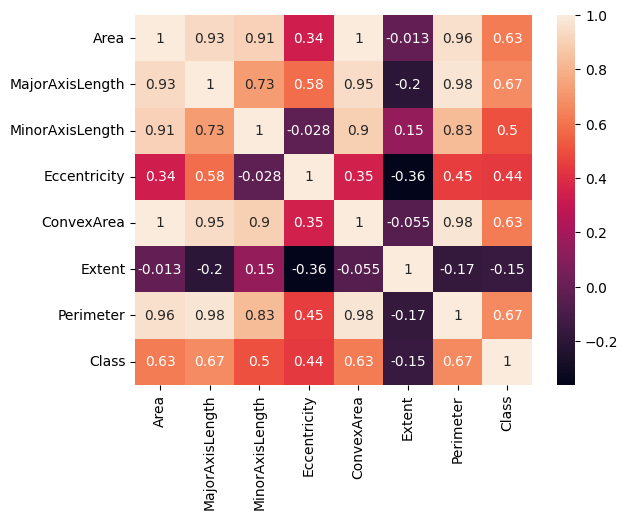

b. Split the dataset into training and test sets


In [25]:
print("4. Data Preparation")
print("a. Do the final feature selection and extract them into Column X and the class label into Column into Y.")
# Feature selection
df_selected_no_outliers = df[selected_features_no_outliers]
print(df_selected_no_outliers)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()



# print(df_selected)
X = df_selected_no_outliers.drop('Class', axis=1)
# Extract label into Y
y = df_selected_no_outliers['Class']

print("b. Split the dataset into training and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [26]:
# 5. Model Building
print("5.a. Perform Model Development using Logistic regression and Decision tree. Deep Learning Models are strictly not allowed.")
# Create a Logistic Regression model
logistic_model = LogisticRegression()
#Train the model
logistic_model.fit(X_train,y_train)
# Make predictions
logistic_predictions = logistic_model.predict(X_test)
print(logistic_predictions)

# Create a Decision Tree Model
decision_tree_model = DecisionTreeClassifier()
print("b. Train the model and print the training accuracy and loss values")
#Train the model
decision_tree_model.fit(X_train, y_train)
# Make predictions
decision_tree_predictions = decision_tree_model.predict(X_test)
print(decision_tree_predictions)


# Calculate Train accuracy for Logistic Regression and Decision Tree.
logistic_train_accuracy = logistic_model.score(X_test, y_test)
print (f"Training accuracy for Logistic Regression: {logistic_train_accuracy}")

decision_tree_train_accuracy = decision_tree_model.score(X_test, y_test)
print (f"Training accuracy for Decision Tree: {decision_tree_train_accuracy}")

logistic_train_predictions = logistic_model.predict_proba(X_train)
logistic_loss = log_loss (y_train, logistic_train_predictions)
print (f"Training loss for Logistic Regression: {logistic_loss}")


5.a. Perform Model Development using Logistic regression and Decision tree. Deep Learning Models are strictly not allowed.
[1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0]
b. Train the model and print the training accuracy and loss values
[1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0
 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0]
Training accuracy for Logistic Regression: 0.85
Training accuracy for Decision

In [27]:
# 6. Performance Evaluation
print("a. Print the confusion matrix. Provide appropriate analysis for the same.")
# Confusion Matrix
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy}")

# Evaluate Logistic Regression model
evaluate_model(logistic_model, X_test, y_test)

# Evaluate Decision Tree model
evaluate_model(decision_tree_model, X_test, y_test)

print("b. Do the prediction for the test data and display the results for the inference.")
# Predictions on the test data
# Display results for inference
logistic_test_predictions = logistic_model.predict(X_test)
print("Test Predictions for Logistic Regression: \n", logistic_test_predictions)

decision_tree_test_predictions = decision_tree_model.predict(X_test)
print("Test Predictions for Decision Tree: \n", decision_tree_test_predictions)

# Calculate test accuracy for Logistic Regression.
logistic_test_accuracy = logistic_model.score(X_test, y_test)
print (f"Test accuracy for Logistic Regression: {logistic_test_accuracy}")

# Calculate test accuracy for Decision Tree
decision_tree_test_accuracy = decision_tree_model.score(X_test, y_test)
print (f"Test accuracy for Decision Tree: {decision_tree_test_accuracy}")



a. Print the confusion matrix. Provide appropriate analysis for the same.
Confusion Matrix:
[[79 15]
 [12 74]]
Accuracy: 0.85
Confusion Matrix:
[[76 18]
 [20 66]]
Accuracy: 0.7888888888888889
b. Do the prediction for the test data and display the results for the inference.
Test Predictions for Logistic Regression: 
 [1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0]
Test Predictions for Decision Tree: 
 [1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0
 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 